In [1]:
import pandas as pd
df=pd.read_csv('all_kindle_review.csv')

In [2]:
df

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


### Goal
:We have a dataset based on this we weant to identify whether the review is : 1.positive 2.Negative

### Except ReviewText and rating remaining all are not much important so we have to drop

In [3]:
df=df[['rating','reviewText']]

In [4]:
df

,rating,reviewText
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...
...,...,...
11995,4,Valentine cupid is a vampire- Jena and Ian ano...
11996,5,I have read all seven books in this series. Ap...
11997,3,This book really just wasn't my cuppa. The si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [5]:
df['rating'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      12000 non-null  int64 
 1   reviewText  12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


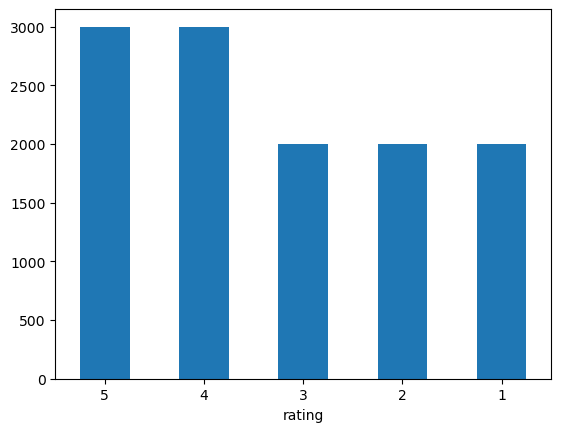

In [7]:
import matplotlib.pyplot as plt
df["rating"].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

In [8]:
df.isnull().sum()

rating        0
reviewText    0
dtype: int64

In [9]:
df.shape

(12000, 2)

In [10]:
df.columns

Index(['rating', 'reviewText'], dtype='object')

### Positive Rating=1 and Negative Rating=0

In [11]:
df["rating"]=df["rating"].apply(lambda x:0 if x<3 else 1)

C:\Users\jagad\AppData\Local\Temp\ipykernel_3332\1764221698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"]=df["rating"].apply(lambda x:0 if x<3 else 1)


In [12]:
df

,rating,reviewText
0,1,"Jace Rankin may be short, but he's nothing to ..."
1,1,Great short read. I didn't want to put it dow...
2,1,I'll start by saying this is the first of four...
3,1,Aggie is Angela Lansbury who carries pocketboo...
4,1,I did not expect this type of book to be in li...
...,...,...
11995,1,Valentine cupid is a vampire- Jena and Ian ano...
11996,1,I have read all seven books in this series. Ap...
11997,1,This book really just wasn't my cuppa. The si...
11998,0,"tried to use it to charge my kindle, it didn't..."


In [13]:
df["rating"].value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

In [14]:
df["reviewText"]=df["reviewText"].str.lower()

C:\Users\jagad\AppData\Local\Temp\ipykernel_3332\3433715960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviewText"]=df["reviewText"].str.lower()


In [15]:
df

,rating,reviewText
0,1,"jace rankin may be short, but he's nothing to ..."
1,1,great short read. i didn't want to put it dow...
2,1,i'll start by saying this is the first of four...
3,1,aggie is angela lansbury who carries pocketboo...
4,1,i did not expect this type of book to be in li...
...,...,...
11995,1,valentine cupid is a vampire- jena and ian ano...
11996,1,i have read all seven books in this series. ap...
11997,1,this book really just wasn't my cuppa. the si...
11998,0,"tried to use it to charge my kindle, it didn't..."


In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove special characters & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Tokenize (split into words)
    words = text.split()
    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]
    # 5. Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    # 6. Join back into string
    return " ".join(words)

# Apply preprocessing
df['clean_review'] = df['reviewText'].astype(str).apply(preprocess_text)

# Preview
print(df[['reviewText', 'clean_review']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          reviewText  \
0  jace rankin may be short, but he's nothing to ...   
1  great short read.  i didn't want to put it dow...   
2  i'll start by saying this is the first of four...   
3  aggie is angela lansbury who carries pocketboo...   
4  i did not expect this type of book to be in li...   

                                        clean_review  
0  jace rankin may short he nothing mess man haul...  
1  great short read didnt want put read one sitti...  
2  ill start saying first four book wasnt expecti...  
3  aggie angela lansbury carry pocketbook instead...  
4  expect type book library pleased find price right  


C:\Users\jagad\AppData\Local\Temp\ipykernel_3332\2677831279.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['reviewText'].astype(str).apply(preprocess_text)


In [17]:
df

,rating,reviewText,clean_review
0,1,"jace rankin may be short, but he's nothing to ...",jace rankin may short he nothing mess man haul...
1,1,great short read. i didn't want to put it dow...,great short read didnt want put read one sitti...
2,1,i'll start by saying this is the first of four...,ill start saying first four book wasnt expecti...
3,1,aggie is angela lansbury who carries pocketboo...,aggie angela lansbury carry pocketbook instead...
4,1,i did not expect this type of book to be in li...,expect type book library pleased find price right
...,...,...,...
11995,1,valentine cupid is a vampire- jena and ian ano...,valentine cupid vampire jena ian another vampi...
11996,1,i have read all seven books in this series. ap...,read seven book series apocalypticadventure on...
11997,1,this book really just wasn't my cuppa. the si...,book really wasnt cuppa situation man capturin...
11998,0,"tried to use it to charge my kindle, it didn't...",tried use charge kindle didnt even register ch...


In [18]:
df.drop(columns=['reviewText'],inplace=True)

C:\Users\jagad\AppData\Local\Temp\ipykernel_3332\649856380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['reviewText'],inplace=True)


In [19]:
df

,rating,clean_review
0,1,jace rankin may short he nothing mess man haul...
1,1,great short read didnt want put read one sitti...
2,1,ill start saying first four book wasnt expecti...
3,1,aggie angela lansbury carry pocketbook instead...
4,1,expect type book library pleased find price right
...,...,...
11995,1,valentine cupid vampire jena ian another vampi...
11996,1,read seven book series apocalypticadventure on...
11997,1,book really wasnt cuppa situation man capturin...
11998,0,tried use charge kindle didnt even register ch...


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(df["clean_review"],df["rating"],random_state=42,test_size=0.2)

In [22]:
x_train

9182     looking forward book came double space every p...
11091    already owned book spouse forgot already part ...
6428     cool forgot request rate came make mine unreli...
288      short short story basically scene party one ni...
2626     secret service agent secrests even longer serv...
                               ...                        
11964    downloaded book reading review usually reading...
5191     far one hottest book ive ever gotten hand ondo...
5390     even though book free reservation based majori...
860      little mushy must take care woman folk charact...
7270     book good good set charaterswith background le...
Name: clean_review, Length: 9600, dtype: object

In [23]:
x_test

1935         really great read wish would hope find author
6494     nope tried cant read take greatest delight del...
1720     story line drug like book much mystery fan wou...
9120     read several angel book one work didnt really ...
360      possibly worst book ever read beginning positi...
                               ...                        
1195     enjoyed read think fan humorous must err use l...
11877    pleasantly surprised book enjoyed m dubois tol...
5421     love best friend since year old he serving nav...
3855     fascinating book enough twist turn keep readin...
4414     plot noted publisher blurb publisher make fun ...
Name: clean_review, Length: 2400, dtype: object

In [24]:
y_train

9182     1
11091    0
6428     1
288      0
2626     1
        ..
11964    0
5191     1
5390     0
860      1
7270     1
Name: rating, Length: 9600, dtype: int64

In [25]:
y_test

1935     1
6494     0
1720     0
9120     0
360      0
        ..
1195     1
11877    1
5421     1
3855     1
4414     1
Name: rating, Length: 2400, dtype: int64

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [30]:
bow=CountVectorizer()
x_train_bow=bow.fit_transform(x_train).toarray()
x_test_bow=bow.transform(x_test).toarray()

In [31]:
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(x_train).toarray()
x_test_tfidf=tfidf.transform(x_test).toarray()

In [32]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

In [36]:
nb_model.fit(x_train_bow,y_train)

GaussianNB()

In [37]:
nb_model_tfidf=GaussianNB()

In [39]:
nb_model_tfidf.fit(x_train_tfidf,y_train)

GaussianNB()

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,confusion_matrix

In [41]:
y_preds_bow=nb_model.predict(x_test_bow)
y_preds_tfidf=nb_model_tfidf.predict(x_test_tfidf)

In [44]:
print(accuracy_score(y_test,y_preds_bow))

0.5770833333333333


In [45]:
print(accuracy_score(y_test,y_preds_tfidf))

0.57875


<Axes: >

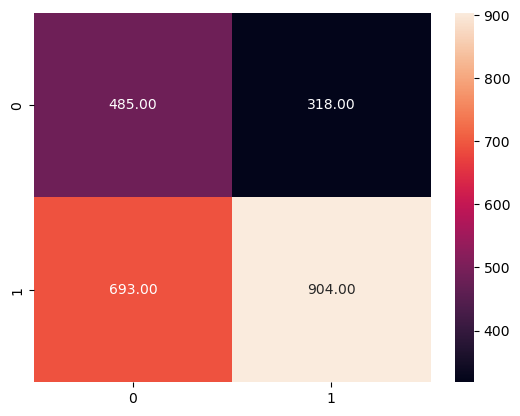

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds_tfidf),annot=True,fmt='.2f')

In [56]:
cm=confusion_matrix(y_test,y_preds_bow)

In [57]:
cm

array([[504, 299],
       [716, 881]], dtype=int64)

In [60]:
dcm=ConfusionMatrixDisplay(cm)

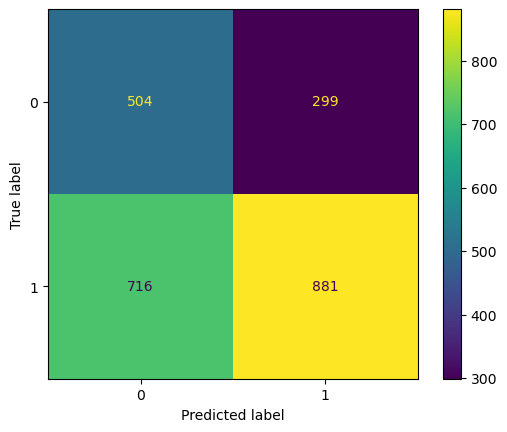

In [61]:
dcm.plot()